In [1]:
# 데이터 분석에 필요한 패키지 설치
%pip install numpy
%pip install pandas
%pip install matplotlib==3.0.3
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
from IPython.display import display

# 경고 문구 제거
warnings.filterwarnings('ignore')


In [3]:
# Notebook내에서 그림 확인 활성화
import os
%matplotlib inline

# 현재 디렉토리 위치 변경 (파일 읽어올 때 더 편리함)
try:
    os.chdir("../data/task2")
except:
    pass


In [4]:
# 한글 폰트 관련 설정
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

if platform.system() == 'Darwin':  # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid')
    rc('font', family='AppleGothic')

elif platform.system() == 'Windows':  # 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    plt.style.use('seaborn-darkgrid')
    rc('font', family=font_name)

elif platform.system() == "Linux":
    plt.style.use("seaborn-darkgrid")
    rc("font", family="NanumGothic")

rc("font", size=13)


## 살펴볼 데이터

- Train 데이터
- Product Catalogue 데이터

## Train 데이터

query와 query 타입 esci 라벨이 있어 각 query가 exact, substitute, irrelevant, complement 중 어디에 해당하는지를 나타내고 있다.  
Task 2, 3이 query와 esci 라벨을 매칭하는 task이기 때문에 동일한 데이터를 사용하고, label만 esci와 (substitute, not substitute)로 다르다.

### 기본적인 정보 확인

- 총 5개의 column으로 이루어짐 
    - example_id
    - query: 사용자가 입력한 검색어
    - product_id: product_catalogue에 연결되는 상품 id
    - query_locale: 검색어 언어
    - esci_label: 4가지 query 타입 (exact, substitute, irrelevant, complement)
- 결측치: 없음
- 데이터 타입: 전부 string

In [5]:
df = pd.read_csv("train-v0.2.csv")
df.head()


,example_id,query,product_id,query_locale,esci_label
0,0,11 degrees,B079VKKJN7,es,exact
1,1,11 degrees,B079Y9VRKS,es,exact
2,2,11 degrees,B07D2DDCZH,es,exact
3,3,11 degrees,B07DP4LM9H,es,exact
4,4,11 degrees,B07G37B9HP,es,exact


In [6]:
# 데이터 크기
df.shape


(1834744, 5)

In [7]:
# 결측치 개수
df.isnull().sum().to_frame("nan_count")


,nan_count
example_id,0
query,0
product_id,0
query_locale,0
esci_label,0


In [8]:
# 데이터 타입
df.dtypes


example_id       int64
query           object
product_id      object
query_locale    object
esci_label      object
dtype: object

### 데이터 샘플 확인

#### query_locale

- 언어는 us가 가장 많다.
- query 타입은 exact, substitute, irrelevant, complement 순으로 많다.
- 모든 언어에서 query 타입의 분포는 유사하다.

In [9]:
df["query_locale"].value_counts()


us    1272626
jp     312397
es     249721
Name: query_locale, dtype: int64

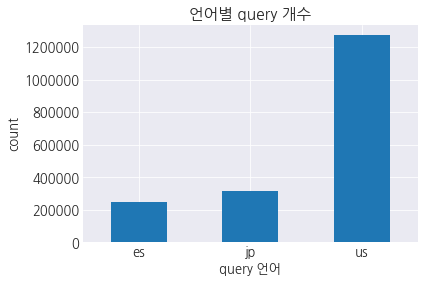

In [10]:
df['query_locale'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('query 언어')
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title('언어별 query 개수')
plt.show()


#### esci_label

- exact의 비율이 가장 높고, complement의 비율이 가장 낮음
- 데이터의 불균형이 심함

In [11]:
df["esci_label"].value_counts()


exact         1196476
substitute     401542
irrelevant     183413
complement      53313
Name: esci_label, dtype: int64

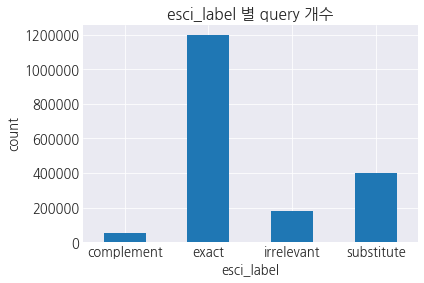

In [12]:
df['esci_label'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('esci_label')
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title('esci_label 별 query 개수')
plt.show()


- 각 언어별 esci_label 분포는 비교적 균일함

In [13]:
grouped_df = df.groupby(["esci_label", "query_locale"])
grouped_unstack = grouped_df.size().unstack()
grouped_unstack


query_locale,es,jp,us
esci_label,,,
complement,14521,10577,28215
exact,141537,180881,874058
irrelevant,30883,39912,112618
substitute,62780,81027,257735


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4326925970>,
      dtype=object)

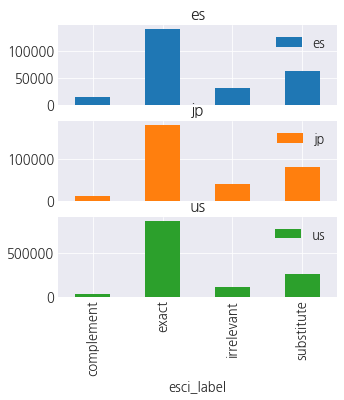

In [14]:
grouped_unstack.plot.bar(figsize=(5, 5), subplots=True)


#### query

- query는 총 91207개이고 동일한 query가 최소 8개씩 존재
- 동일한 query여도 결과는 상이함

In [15]:
# query 예시 확인
query_counts = df["query"].value_counts().sort_values()
query_counts


creative sound blaster g6                                 8
ottostyle.jp キャットタワー grande 【ベージュ】 天井つっぱり棒なしタイプ 据え置き      8
zeckos halloween wall art                                 8
magic wand attachments                                    8
windshield washer tablets 100 pcs                         8
                                                       ... 
ssd                                                     176
ipad                                                    181
laptop                                                  193
tv                                                      214
airpods                                                 233
Name: query, Length: 91207, dtype: int64

In [16]:
display(df.loc[df["query"] == query_counts.keys()[0]])
display(df.loc[df["query"] == query_counts.keys()[1]])

,example_id,query,product_id,query_locale,esci_label
31600,31600,creative sound blaster g6,B009RPQA2G,es,substitute
31601,31601,creative sound blaster g6,B00A152RYG,es,substitute
31602,31602,creative sound blaster g6,B019QKDH86,es,substitute
31603,31603,creative sound blaster g6,B01EOPT0VG,es,substitute
31604,31604,creative sound blaster g6,B01N5FV9PC,es,substitute
31605,31605,creative sound blaster g6,B073HT4GM4,es,substitute
31606,31606,creative sound blaster g6,B07FY45F2S,es,exact
31607,31607,creative sound blaster g6,B07NLRC3PN,es,exact


,example_id,query,product_id,query_locale,esci_label
1790241,1790241,ottostyle.jp キャットタワー grande 【ベージュ】 天井つっぱり棒なしタイ...,B00V7KHFD2,jp,exact
1790242,1790242,ottostyle.jp キャットタワー grande 【ベージュ】 天井つっぱり棒なしタイ...,B073W7GS15,jp,complement
1790243,1790243,ottostyle.jp キャットタワー grande 【ベージュ】 天井つっぱり棒なしタイ...,B073W815ZJ,jp,substitute
1790244,1790244,ottostyle.jp キャットタワー grande 【ベージュ】 天井つっぱり棒なしタイ...,B074WMW227,jp,exact
1790245,1790245,ottostyle.jp キャットタワー grande 【ベージュ】 天井つっぱり棒なしタイ...,B077HPW7LG,jp,substitute
1790246,1790246,ottostyle.jp キャットタワー grande 【ベージュ】 天井つっぱり棒なしタイ...,B07N63DB22,jp,substitute
1790247,1790247,ottostyle.jp キャットタワー grande 【ベージュ】 天井つっぱり棒なしタイ...,B083YVVCX8,jp,exact
1790248,1790248,ottostyle.jp キャットタワー grande 【ベージュ】 天井つっぱり棒なしタイ...,B085G1G7T5,jp,exact


- query를 space 기준으로 분리했을 때 길이가 3인 query 들이 가장 많았고, 최대 길이는 29 였음

In [17]:
df["query_tokens"] = df["query"].apply(lambda e: e.split())
df["query_token_lengths"] = df["query_tokens"].apply(lambda e: len(e))
sorted_by_query_token_lengths = df.sort_values(by=["query_token_lengths"])


In [18]:
sorted_by_query_token_lengths.head(3)

,example_id,query,product_id,query_locale,esci_label,query_tokens,query_token_lengths
917371,917371,mz-v7p512bw,B07K1LWPVR,us,substitute,[mz-v7p512bw],1
1532088,1532088,fucoidan,B081GBV8Q8,jp,exact,[fucoidan],1
1532087,1532087,fucoidan,B07TD1VW9G,jp,exact,[fucoidan],1


In [19]:
sorted_by_query_token_lengths.tail(3)

,example_id,query,product_id,query_locale,esci_label,query_tokens,query_token_lengths
1434791,1434791,Something versatile. Like a plain black puff c...,B000NCZU0A,us,irrelevant,"[Something, versatile., Like, a, plain, black,...",29
1434782,1434782,"My new laptop would be silver, have the best s...",B011O00VM6,us,irrelevant,"[My, new, laptop, would, be, silver,, have, th...",29
1434785,1434785,"My new laptop would be silver, have the best s...",B01JHD9FIS,us,irrelevant,"[My, new, laptop, would, be, silver,, have, th...",29


- 언어별 query 길이 비교
    - es: 최대 12
    - jp: 최대 13 (일본어의 경우에는 띄어쓰기를 하지 않아도 된다고 하여 크게 의미가 없을 것 같다.)
    - us: 최대 29

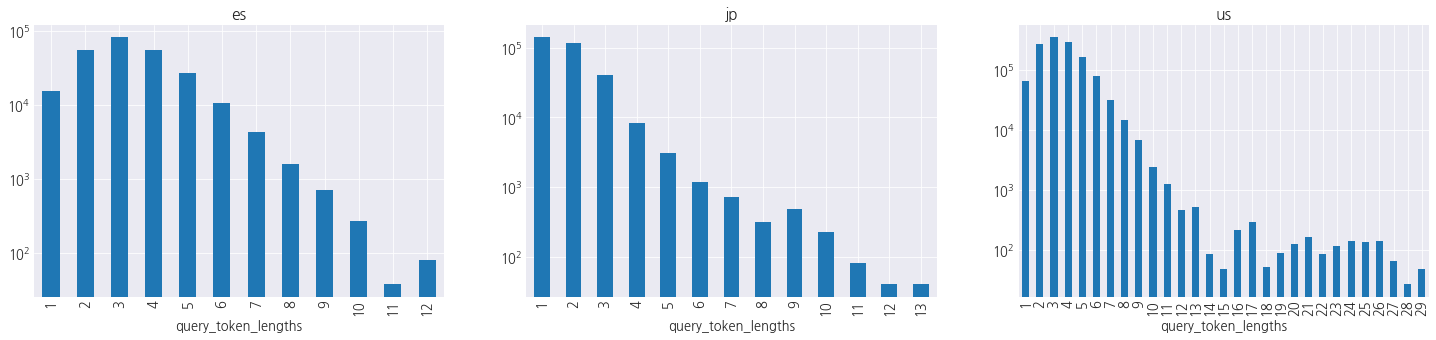

In [20]:
grouped_query_tokens = df.groupby(["query_locale"])

fig, axes = plt.subplots(figsize=(25, 5), nrows=1,
                         ncols=len(grouped_query_tokens.groups.keys()))

for key, ax in zip(grouped_query_tokens.groups.keys(), axes.flatten()):
    lang_group = grouped_query_tokens.get_group(key)
    length_group = lang_group.groupby("query_token_lengths").size()
    length_group.plot(ax=ax, kind="bar", logy=True)
    ax.set_title(key)


## Product Catalogue 데이터
### 기본적인 정보 확인



In [21]:
product_df = pd.read_csv("product_catalogue-v0.2.csv")
product_df.head()


,product_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale
0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es
1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),NaN,NaN,11 Degrees,Blanco,es
2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es
3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,NaN,NaN,11 Degrees,NaN,es
4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,NaN,NaN,11 Degrees,Negro (,es


In [22]:
product_df[product_df["product_locale"] == "jp"].head(3)

,product_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale
933996,B06WVHDWVR,(エイトトウキョウ)eight tokyo サングラス スタイリッシュ スクエア メンズ レ...,【おすすめＰＯＩＮＴ】<br> ■紫外線カット率99パーセント以上。あなたの目と肌をお守りし...,eight tokyoは株式会社エイトの商標登録アイウェアブランドです。紫外線（ＵＶ）カット...,eight tokyo(エイトトウキョウ),ブラック/ライトブルー,jp
933997,B06X17FJN7,What Say カラーレンズ ミラーレンズ サングラス クリアレンズ 伊達メガネ 全17色...,ソフト ＆ ハード ケース はランダムとなります。<br> また、弊社都合により 付属品 メ...,【 セット内容 】 ： オリジナルバンブーメガネケース・マイクロファイバークロスケース・商品...,What Say,ライト ブルー/ブラック,jp
933998,B071KNF11Z,アジアンサイズ 最適装着感 偏光レンズ 完全紫外線カット オリジナル スポーツサングラス PB15,<p>１、最適着用感：アジアンサイズよりフレーム形状を微調整、テンプルを長くまるく、かこまれ...,最適着用感：アジアンサイズよりフレーム形状を微調整、テンプルを長くまるく、かこまれた安定ホー...,SHD-PB,PB15,jp


In [23]:
# 데이터 크기
product_df.shape


(1815216, 7)

In [24]:
# 데이터 통계량
product_df.describe()


,product_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale
count,1815216,1814924,937139,1510821,1672228,1123949,1815216
unique,1803063,1782254,795475,1277908,305167,253187,3
top,B00J59LEBG,Episode 1,1,Used Book in Good Condition,Nike,Black,us
freq,3,152,1683,2826,6160,128344,1216070


In [70]:
# 결측치 개수
product_df.isnull().sum().to_frame("nan_count")


,nan_count
product_id,0
product_title,292
product_description,878077
product_bullet_point,304395
product_brand,142988
product_color_name,691267
product_locale,0


In [ ]:
# 결측치 비율
pd.DataFrame(data=product_df.isnull().sum() /
             len(product_df), columns=['nan_ratio'])


,nan_ratio
product_id,0.000000
product_title,0.000161
product_description,0.483731
product_bullet_point,0.167691
product_brand,0.078772
product_color_name,0.380818
product_locale,0.000000


In [ ]:
# 데이터 타입
product_df.dtypes


product_id              object
product_title           object
product_description     object
product_bullet_point    object
product_brand           object
product_color_name      object
product_locale          object
dtype: object

### 데이터 샘플 확인

In [ ]:
product_df["product_color_name"].value_counts().sort_values()


コン (002)                               1
Antimanchas Essence Gris Perla         1
Curved Spoonula                        1
Black Cap & Body                       1
White Thread                           1
                                   ...  
Negro                              23249
Blue                               23391
ブラック                               23894
White                              56619
Black                             128344
Name: product_color_name, Length: 253187, dtype: int64

In [26]:
product_df["product_brand"].value_counts()


Nike                 6160
adidas               5842
ノーブランド品              5415
Amazon Essentials    4657
Under Armour         3431
                     ... 
Detigsia                1
Zeng Qiong              1
Heemburg                1
SYEA                    1
FUMUM                   1
Name: product_brand, Length: 305167, dtype: int64

#### product_description 길이 확인

- 일본어의 경우에는 단어별로 자르기 어려워 영어와 스페인어만 확인
- 영어의 경우에 가장 긴 문장의 길이가 5216 (1개 example)
- 스페인어의 경우 가장 긴 문장의 길이가 668

In [64]:
product_descriptions = product_df.loc[product_df["product_locale"] != "jp", ["product_description", "product_locale"]].dropna()
product_descriptions["product_description"] = product_descriptions["product_description"].apply(lambda x: len(str(x).split()))


In [69]:
grouped = product_descriptions.groupby("product_locale")
display(grouped.get_group("es").value_counts())
display(grouped.get_group("us").value_counts())

product_description  product_locale
7                    es                668
8                    es                643
9                    es                614
14                   es                589
15                   es                586
                                      ... 
524                  es                  1
526                  es                  1
530                  es                  1
532                  es                  1
1030                 es                  1
Length: 545, dtype: int64

product_description  product_locale
1                    us                5216
11                   us                4039
12                   us                3976
9                    us                3932
3                    us                3836
                                       ... 
632                  us                   1
637                  us                   1
638                  us                   1
644                  us                   1
859                  us                   1
Length: 657, dtype: int64